In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=yf.download('META',start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,79.540001,79.800003,77.860001,78.019997,78.019997,19935400
2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
...,...,...,...,...,...,...
2024-01-12,370.160004,377.059998,369.540009,374.489990,374.489990,19295700
2024-01-16,373.649994,375.609985,367.230011,367.459991,367.459991,15306900
2024-01-17,366.299988,368.540009,358.609985,368.369995,368.369995,12724800


In [4]:
def RSI(data, window=15):
    delta=data['Close'].diff()
    gain=delta.where(delta >0,0)
    loss=delta.where(delta <0,0)
    avg_gain=gain.rolling(window=window).mean()
    avg_loss=abs(loss.rolling(window=window).mean())
    RS=avg_gain/avg_loss
    RSI=100-(100/(1+RS))
    data['RSI']=RSI

In [5]:
RSI(df)
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2015-01-22,77.169998,77.750000,76.680000,77.650002,77.650002,19519500,48.518833
2015-01-23,77.650002,78.190002,77.040001,77.830002,77.830002,16746500,49.250217
2015-01-26,77.980003,78.470001,77.290001,77.500000,77.500000,19260800,46.221171
2015-01-27,76.709999,76.879997,75.629997,75.779999,75.779999,20110000,44.589394
2015-01-28,76.900002,77.639999,76.000000,76.239998,76.239998,53306400,50.361431
...,...,...,...,...,...,...,...
2024-01-12,370.160004,377.059998,369.540009,374.489990,374.489990,19295700,71.595003
2024-01-16,373.649994,375.609985,367.230011,367.459991,367.459991,15306900,61.033176
2024-01-17,366.299988,368.540009,358.609985,368.369995,368.369995,12724800,62.319065


In [6]:
df['RSI'].max()

95.5349120017277

In [7]:
df['RSI'].min()

12.04106524954733

In [8]:
def directional_change(close: np.array, high: np.array,index : np.array ,low: np.array, sigma: float):
    
    up_zig = True # Last extreme is a bottom. Next is a top. 
    tmp_max = high[0]
    tmp_min = low[0]
    tmp_max_i = 0
    tmp_min_i = 0

    tops = []
    bottoms = []
    x=[]
    for i in range(len(close)):
        if up_zig: # Last extreme is a bottom
            if high[i] > tmp_max:
                # New high, update 
                tmp_max = high[i]
                tmp_max_i = i
            elif close[i] < tmp_max - tmp_max * sigma: 
                # Price retraced by sigma %. Top confirmed, record it
                # top[0] = confirmation index
                # top[1] = index of top
                # top[2] = price of top
                top = [index[tmp_max_i], tmp_max+tmp_max*0.001]
                tops.append(top)

                # Setup for next bottom
                up_zig = False
                tmp_min = low[i]
                tmp_min_i = i
        else: # Last extreme is a top
            if low[i] < tmp_min:
                # New low, update 
                tmp_min = low[i]
                tmp_min_i = i
            elif close[i] > tmp_min + tmp_min * sigma: 
                # Price retraced by sigma %. Bottom confirmed, record it
                # bottom[0] = confirmation index
                # bottom[1] = index of bottom
                # bottom[2] = price of bottom
                bottom = [index[tmp_min_i], tmp_min-tmp_min*0.001]
                bottoms.append(bottom)

                # Setup for next top
                up_zig = True
                tmp_max = high[i]
                tmp_max_i = i

    return tops, bottoms

In [9]:
tops, bottoms = directional_change(df['RSI'].to_numpy(), df['RSI'].to_numpy(),df.index.to_numpy(),df['RSI'].to_numpy(), 0.001)
len(tops)

580

In [10]:
df['RSI']

Date
2015-01-22    48.518833
2015-01-23    49.250217
2015-01-26    46.221171
2015-01-27    44.589394
2015-01-28    50.361431
                ...    
2024-01-12    71.595003
2024-01-16    61.033176
2024-01-17    62.319065
2024-01-18    65.867111
2024-01-19    67.931141
Name: RSI, Length: 2264, dtype: float64

In [11]:
tp=pd.DataFrame()
tp[['Date','Price']]=tops
tp.index=tp.Date
x=pd.to_datetime(tp.index)
tp.set_index(x, inplace=True)
t=tp.asfreq('D')
tp

,Date,Price
Date,,
2015-01-23,2015-01-23,49.299467
2015-01-29,2015-01-29,56.566005
2015-02-06,2015-02-06,51.684596
2015-02-11,2015-02-11,49.111835
2015-02-19,2015-02-19,61.927537
...,...,...
2023-12-28,2023-12-28,82.773515
2024-01-03,2024-01-03,67.972398
2024-01-08,2024-01-08,72.530623


In [12]:
bt=pd.DataFrame()
bt[['Date','Price']]=bottoms
bt.index=bt.Date
y=pd.to_datetime(bt.index)
bt.set_index(y, inplace=True)
f=tp.asfreq('D')

In [13]:
bt

,Date,Price
Date,,
2015-01-27,2015-01-27,44.544805
2015-02-02,2015-02-02,40.637288
2015-02-10,2015-02-10,45.369454
2015-02-13,2015-02-13,41.213962
2015-02-20,2015-02-20,57.78045
...,...,...
2024-01-02,2024-01-02,61.366688
2024-01-04,2024-01-04,63.572751
2024-01-09,2024-01-09,69.945989


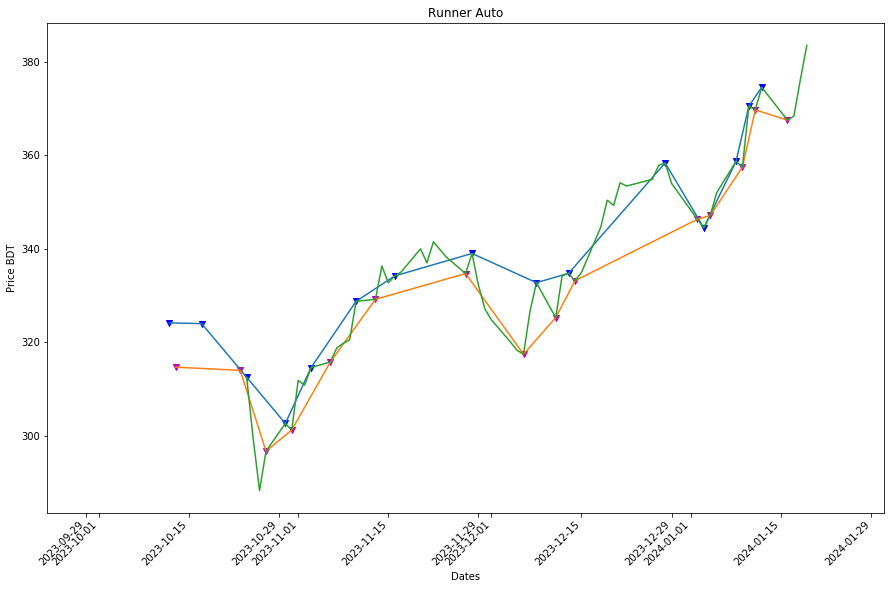

In [14]:
#df1=df[:50]

plt.figure(figsize=(15,10))
plt.scatter(np.array(df.loc[tp.index][-15:].index),np.array(df.loc[tp.index][-15:].Close.values),color='b',marker='v')
plt.scatter(np.array(df.loc[bt.index][-15:].index),np.array(df.loc[bt.index][-15:].Close.values),color='m',marker='v')
plt.plot(np.array(df.loc[tp.index][-15:].index),np.array(df.loc[tp.index][-15:].Close.values))
plt.plot(np.array(df.loc[bt.index][-15:].index),np.array(df.loc[bt.index][-15:].Close.values))
df['Close'][-60:].plot(figsize=(15,10))

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.title('Runner Auto')
plt.xlabel('Dates')
plt.ylabel('Price BDT')
plt.show()

In [15]:
df.loc[bt.index][40:60].Close.values

array([ 94.06999969,  97.11000061, 103.76999664, 101.97000122,
       102.58000183, 106.48999786, 104.04000092, 106.26000214,
       105.44999695, 104.37999725, 102.12000275, 104.04000092,
       105.51000214, 105.93000031, 106.22000122, 102.22000122,
        97.33000183,  95.44000244,  94.16000366,  94.44999695])

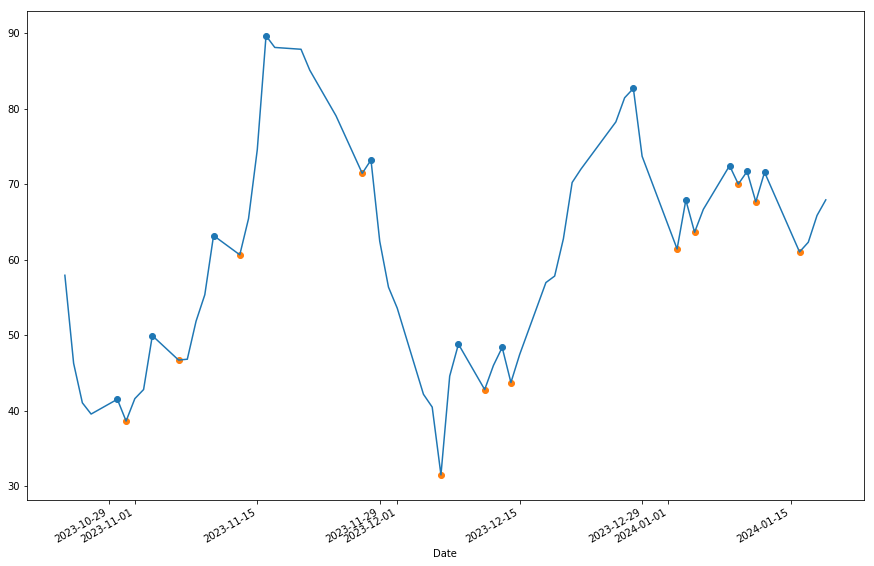

In [16]:
df['RSI'][-60:].plot(figsize=(15,10))
plt.scatter(np.array(df.loc[tp.index][-12:].index),np.array(df.loc[tp.index][-12:].RSI.values))
plt.scatter(np.array(df.loc[bt.index][-12:].index),np.array(df.loc[bt.index][-12:].RSI.values))